In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data_dir_path = 'traffic_signs_dataset'
data_dir = pathlib.Path(data_dir_path)

In [3]:
class_count = len(list(data_dir.glob('Train/*')))
print(class_count)

43


In [4]:
for i in range(class_count):
    image_count = len(list(data_dir.glob('Train/' + str(i) + '/*')))
    print('Class ' + str(i) + ' count: ' + str(image_count))

Class 0 count: 210
Class 1 count: 2220
Class 2 count: 2250
Class 3 count: 1410
Class 4 count: 1980
Class 5 count: 1860
Class 6 count: 420
Class 7 count: 1440
Class 8 count: 1410
Class 9 count: 1470
Class 10 count: 2010
Class 11 count: 1320
Class 12 count: 2100
Class 13 count: 2160
Class 14 count: 780
Class 15 count: 630
Class 16 count: 420
Class 17 count: 1110
Class 18 count: 1200
Class 19 count: 210
Class 20 count: 360
Class 21 count: 330
Class 22 count: 390
Class 23 count: 510
Class 24 count: 270
Class 25 count: 1500
Class 26 count: 600
Class 27 count: 240
Class 28 count: 540
Class 29 count: 270
Class 30 count: 450
Class 31 count: 780
Class 32 count: 240
Class 33 count: 689
Class 34 count: 420
Class 35 count: 1200
Class 36 count: 390
Class 37 count: 210
Class 38 count: 2070
Class 39 count: 300
Class 40 count: 360
Class 41 count: 240
Class 42 count: 240


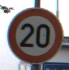

In [5]:
train = list(data_dir.glob('Train/0/*'))
Image.open(str(train[0]))

In [6]:
data = []
labels = []
classes = class_count
cur_path = os.getcwd()

In [7]:
for i in range(classes):
    path = os.path.join(cur_path, data_dir_path, 'Train', str(i))
    images = os.listdir(path)
    for image in images:
        try:
            image = Image.open(path + '/' + image)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print('Error loading image', i, image)
            
data = np.array(data)
labels = np.array(labels)

In [8]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, 
    test_size = 0.2, 
    random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [10]:
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367, 43) (7842, 43)


In [12]:
model = Sequential([
    layers.Conv2D(filters = 32, kernel_size = (5, 5), 
                  activation = 'relu', input_shape = X_train.shape[1:]),
    layers.MaxPool2D(pool_size = (2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2, 2)),
    
    layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2, 2)),
    
    layers.Flatten(),
    layers.Dense(256, activation = 'relu'),
    layers.Dropout(rate = 0.25),
    layers.Dense(classes, activation = 'softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [14]:
model.compile(
    loss = 'categorical_crossentropy', 
    optimizer = 'adam', 
    metrics = ['accuracy']
)

In [15]:
history = model.fit(
    X_train, y_train, 
    batch_size = 128, 
    epochs = 10, 
    validation_data = (X_test, y_test)
)

Epoch 1/10
246/246 [==============================] - 247s 1s/step - loss: 1.7713 - accuracy: 0.5750 - val_loss: 0.4683 - val_accuracy: 0.8701
Epoch 2/10
246/246 [==============================] - 243s 988ms/step - loss: 0.3491 - accuracy: 0.9093 - val_loss: 0.1895 - val_accuracy: 0.9542
Epoch 3/10
246/246 [==============================] - 243s 988ms/step - loss: 0.1560 - accuracy: 0.9598 - val_loss: 0.1774 - val_accuracy: 0.9529
Epoch 4/10
246/246 [==============================] - 243s 988ms/step - loss: 0.1128 - accuracy: 0.9705 - val_loss: 0.0859 - val_accuracy: 0.9781
Epoch 5/10
246/246 [==============================] - 243s 988ms/step - loss: 0.0878 - accuracy: 0.9768 - val_loss: 0.0804 - val_accuracy: 0.9801
Epoch 6/10
246/246 [==============================] - 322s 1s/step - loss: 0.0477 - accuracy: 0.9865 - val_loss: 0.0909 - val_accuracy: 0.9763
Epoch 7/10
246/246 [==============================] - 355s 1s/step - loss: 0.0889 - accuracy: 0.9756 - val_loss: 0.0698 - val_accu

Best validation loss:  0.0635889545083046
Best validation accuracy:  0.9841877222061157


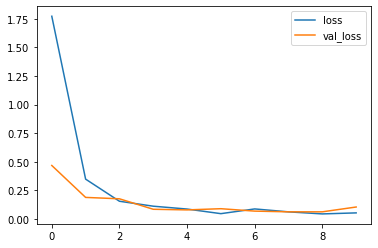

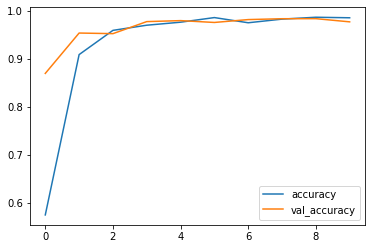

In [16]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

print('Best validation loss: ', history_frame['val_loss'].min()) 
print('Best validation accuracy: ', history_frame['val_accuracy'].max()) 

In [17]:
test_df = pd.read_csv('traffic_signs_dataset/Test.csv')
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [18]:
test_df.shape

(12630, 8)

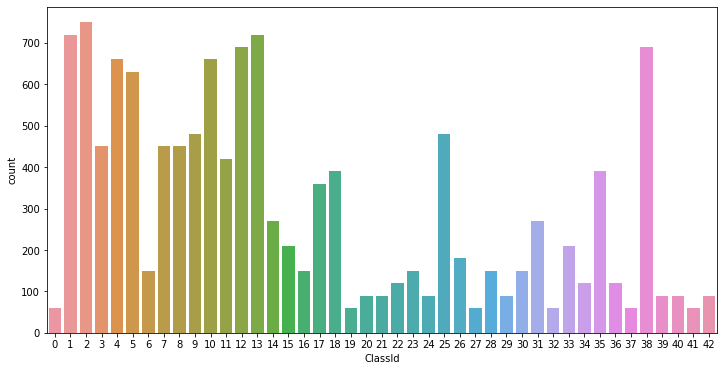

In [19]:
plt.figure(figsize = (12, 6))
sns.countplot(test_df['ClassId'])

In [20]:
labels = test_df['ClassId'].values
imgs = data_dir_path + '/' + test_df['Path'].values
data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))
    
X_test = np.array(data)
pred_labels = np.argmax(model.predict(X_test), axis = -1)

print(accuracy_score(labels, pred_labels))

0.9369754552652415


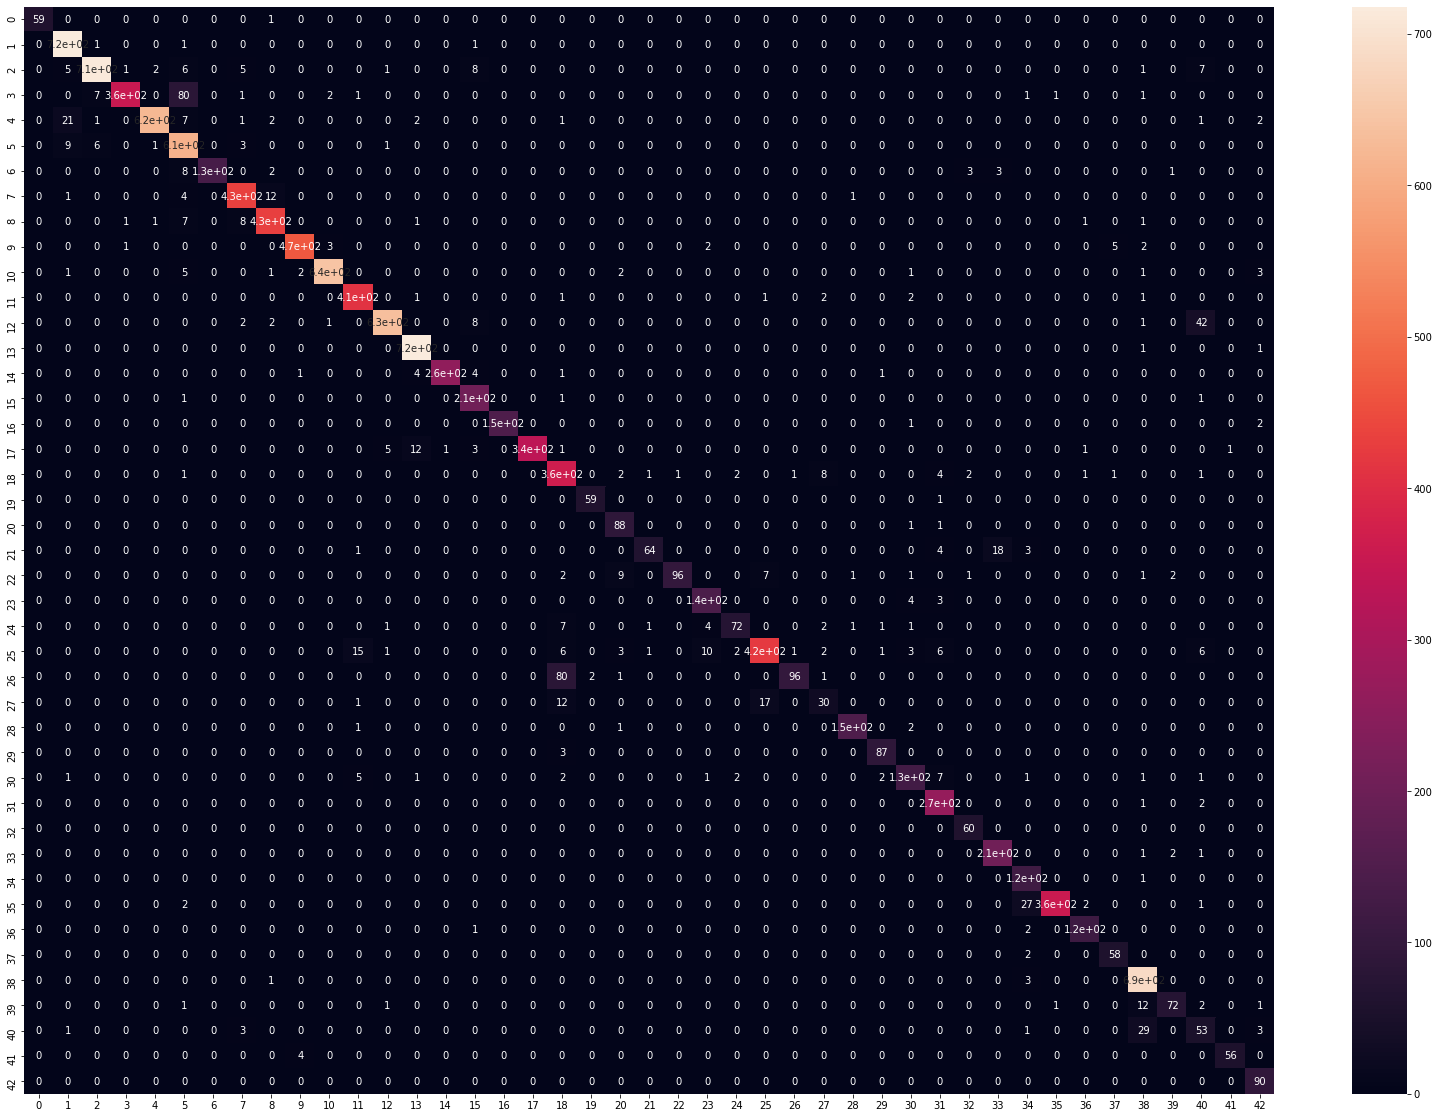

In [21]:
plt.figure(figsize = (28, 20))
sns.heatmap(confusion_matrix(labels, pred_labels), annot = True)

In [22]:
model.save('traffic_signs_classifier.h5')